<a href="https://colab.research.google.com/github/Angegloria/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/AG3/Gloria_Angelina_Estrada_Galindo_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AG3 - Actividad Guiada 3

Nombre y Apellidos:   <br> Gloria Angelina Estrada Galindo

Url: https://github.com/Angegloria/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/AG3/Gloria_Angelina_Estrada_Galindo_AG3.ipynb<br>



• Desarrollar algoritmos con la técnica del descenso del gradiente

Este algoritmo es muy importante dentro de la inteligencia artificial, ya que es un algoritmo de optimizacion que converge hacia el valor minimo de una funcion.Tambien se usa para minimizar una funcion que mide el error de un modelo.En realidad el descenso del gradiente es la generalizacion vectorial de la derivada de una funcion.

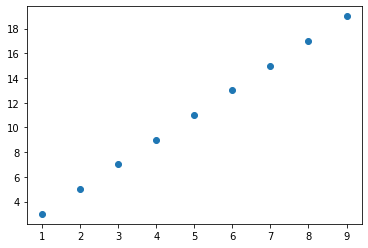

In [0]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1,10)
y = 2*x+1
plt.plot(x,y,'o')
plt.show()

In [0]:
error = lambda var: np.sum(y-(var[0]*x+var[1]))**2
derror = lambda var: np.array([np.sum(-x*(y-(var[0]*x+var[1]))),np.sum(-(y-(var[0]*x+var[1])))])
m0 = 2.5 # punto de partida
b0 = 1.5 # punto de partida
var0 = np.array([m0,b0])

def gradient_descent(f,df,x0,lr=0.005, TOL=1e-6):
    '''
    Implementa la funcion de descenso del gradiente.
    Entradas: 
        f - una funcion Python para minimizacion
        df - la derivada (una funcion Python) de la funcion f
        x0 - un numpy array, el punto de partida 
        lr - un float, tasa de aprendizaje (por defecto, 0.005)
        TOL - un float, la tolerancia de conversion (por defecto, 1e-6)
    Salida:
        x - el punto que tiene el minimo de la funcion f
    
    '''
    f_i = f(x0)
    TOL_i = 1000
    
    x = x0
    i = 0
    #print(f"{'i':2} \t {'x':5} \t {'f_i':5.3f} \t {'TOL_i':5f}")
    while TOL_i > TOL:
        f_old = f_i

        df_i = df(x)
        x = x - lr*df_i
        f_i = f(x)
        TOL_i = abs(f_i-f_old)
        
        if i%50 ==0:
            print(f'{i:2} \t {f_i:5.3f} \t {TOL_i:5.3f}')
        i += 1
        if i > 1000:
            print('Hay un error en la iteracion. No hay conversion')
            break

    return x

var = gradient_descent(error,derror,var0)


 0 	 128.596 	 600.404
50 	 0.223 	 0.004
100 	 0.088 	 0.002
150 	 0.035 	 0.001
200 	 0.014 	 0.000
250 	 0.005 	 0.000
300 	 0.002 	 0.000
350 	 0.001 	 0.000
400 	 0.000 	 0.000
450 	 0.000 	 0.000
500 	 0.000 	 0.000


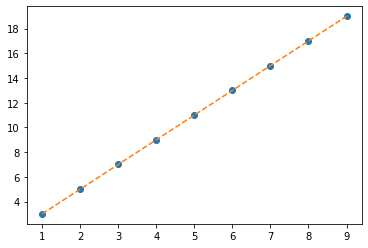

In [0]:
plt.plot(x,y,'o')
plt.plot(x,var[0]*x+var[1],'--')


In [0]:
f2 = lambda x: x**2
df2 = lambda x: 2*x
x0 = 1

x = gradient_descent(f2,df2,x0)

 0 	 0.980 	 0.020
50 	 0.359 	 0.007
100 	 0.131 	 0.003
150 	 0.048 	 0.001
200 	 0.018 	 0.000
250 	 0.006 	 0.000
300 	 0.002 	 0.000
350 	 0.001 	 0.000
400 	 0.000 	 0.000
450 	 0.000 	 0.000


In [0]:
x

0.006978886433872219

• Desarrollar algoritmos con la técnica de búsqueda tabú

Esta tecnica se basa en la busqueda de la solucion optima para escapar de optimos locales. Este algoritmo tambien es de optimizacion y por eso use el ejemplo de la mochila.La solucion de la tecnica tabu mantiene un numero de iteraciones hasta que satisface cierta condicion,llamada criterio de aspiracion. La caracteristica que diferencia a la busqueda local de otros metodos es su capacidad de memoria, ya que algunos metodos como los algoritmos geneticos o recocido simulado carecen de memoria, la busqueda tabu tiene memoria adaptativa.


In [0]:
# Problema de la mochila
w = np.array([4,5,7,9,6]) # peso de cada objeto
p = np.array([2,2,3,4,4]) # beneficio de cada objeto
b = 23 # la capacidad de la mochila
alpha = 15

f = lambda s: np.sum(p*s) - alpha*np.max([0,(np.sum(w*s)-b)]) # funcion de evaluacion
pt = lambda s: np.sum(w*s) # criterio de desempate

s = [0,1,0,1,0]
f_s = f(s)
pt_s = pt(s)

T = -1000 # lista tabu
best_s = s
best_f = f_s
iter_ = 0
best_iter = 0
BTmax = 1 # el numero de iteraciones maximo sin mejora de best_s

while True:
    iter_ += 1
    vecinos = [] # se obtienen los vecinos del punto actual
    for idx in range(len(s)):
        s2 = s.copy()
        if s2[idx] == 0:
            s2[idx] = 1
        else:
            s2[idx] = 0
        vecinos.append(s2)
    
    # calcula pesos y beneficios
    vecinos = np.array(vecinos)
    pesos = np.array([pt(vecino) for vecino in vecinos])
    func =  np.array([f(vecino) for vecino in vecinos])
    

    idx_best = np.argmax(func) # cual es el vecino con el mayor beneficio
    if idx_best == T:
        if idx_best == 0:
            func[idx_best]= func[idx_best+1]-1
        else:
            func[idx_best]= func[idx_best-1]-1
        idx_best = np.argmax(func) # cual es el vecino con el mayor beneficio

    tie_check = func == func[idx_best]
    if sum(tie_check) > 1: # si hay un empate, calcula el peso para desempatar
        mejor_peso = -1000
        for idx, valor in enumerate(func):
            if valor == func[idx_best]:
                if pesos[idx] < mejor_peso:
                    mejor_peso = pesos[idx]
                    idx_best = idx

    best_f_iter = func[idx_best]
    best_s_iter = vecinos[idx_best,:]
    s = best_s_iter.copy()
    T = idx_best # usa como tabu al mejor vecino

    if best_f_iter > best_f:
        best_f = best_f_iter
        best_s = best_s_iter  
        best_iter = iter_
    
    
    if (iter_-best_iter)> BTmax: # cuando no hay mejor iteracion, entonces se detiene el algoritmo
        break
    
    if iter_ > 10: # limite de iteraciones
        break
    

print(best_s)
print(best_f)

[0 0 1 1 1]
11


In [0]:
f([1,1,0,1,1])

-3

• Desarrollar algoritmos con la técnica de recocido simulado(simulated annealing)

El mayor proposito de dicho algoritmo es acercarse al valor optimo de una funcion, en un espacio de busqueda grande.Tambien es un procedimiento iterativo que permite movimientos de forma probabilistica. Este algoritmo hace la imitacion de un sistema fisico inestable hacia un equilibrio termodinamico a una temperatura fisica. Entonces en cada iteracion nos da una nueva solucion que es seleccionada de forma aleatoria de la vecindades de la solucion actual.
 

In [0]:
import numpy as np

# funcion para ser minimizada
f = lambda x: 0.2 + x[0]**2+x[1]**2-0.1*np.cos(6*np.pi*x[0])-0.1*np.cos(6*np.pi*x[1])


def sim_annealing(f,x0):
    '''
    Hace una minimizacion con recocido simulado de f utilizando como punto de partida x0.
    Entradas:
        f - funcion que retorna un numero float
        x0 - un numero o array (punto de partida)
    Salida:
        results - una lista de los valores de x obtenidos en cada iteracion
    '''
    T = 100 # temperatura inicial
    fbest = f(x0)
    xbest = x0
    xn = x0
    fn = fbest
    
    results = []
    iter_ = 1
    while T > 1:
        if iter_%200 == 0:
            print(f'T = {T} \t xn = {xn} \t xbest = {xbest} \t fn = {fn:.3f} \t fbest = {fbest:.3f}')
        # Obtiene un vecino de x aleatorio
        xnew = np.array([np.random.uniform(xn[0]-10,xn[0]+10),np.random.uniform(xn[1]-10,xn[1]+10)])
        fnew = f(xnew)
        omega = abs(fnew - fn) # diferencia de costo para probabilidad
        pn = np.exp(-omega/T) # la funcion de probabilidad 
        if fnew < fn:
            xn = xnew # si f es menor entonces acepta la solucion
        if fnew < fbest: # actualiza el mejor valor de f
            fbest = fnew
            xbest = xnew
        else: # si el valor no es mejor, examina la probabilidad para aceptar a este vecino
            p = np.random.uniform()
        
            if p <= pn:
                xn = xnew
        T = 0.999*T # baja la temperatura
        results.append(list(xbest))
        iter_+=1
    return results
        
        
results = sim_annealing(f,np.array([-5,5]))    

T = 81.9468297776413 	 xn = [16.2490446  -5.69731085] 	 xbest = [-1.12369493  1.03879018] 	 fn = 50.000 	 fbest = 2.536
T = 67.0856762769511 	 xn = [-3.82259797 -5.16601872] 	 xbest = [ 0.96722459 -0.52275594] 	 fn = 50.000 	 fbest = 1.418
T = 54.91961035890876 	 xn = [-1.40147532  0.01011051] 	 xbest = [-0.18118588  0.23187367] 	 fn = 50.000 	 fbest = 0.416
T = 44.95987473574339 	 xn = [ 4.46559915 -5.35816333] 	 xbest = [-0.18118588  0.23187367] 	 fn = 50.000 	 fbest = 0.416
T = 36.8063488259224 	 xn = [1.90132847 7.73960995] 	 xbest = [-0.36202919  0.39177671] 	 fn = 50.000 	 fbest = 0.354
T = 30.1314743837237 	 xn = [-9.11960929 -2.53943022] 	 xbest = [ 0.38656224 -0.30523039] 	 fn = 50.000 	 fbest = 0.303
T = 24.6670962347009 	 xn = [10.32716523 -4.17543802] 	 xbest = [ 0.38656224 -0.30523039] 	 fn = 50.000 	 fbest = 0.303
T = 20.193689459174745 	 xn = [ 1.78439508 -1.90991871] 	 xbest = [ 0.38656224 -0.30523039] 	 fn = 50.000 	 fbest = 0.303
T = 16.531540238608475 	 xn = [ 3.0944

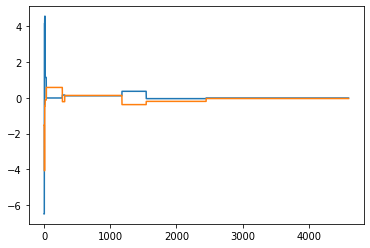

In [0]:
import matplotlib.pyplot as plt

results = np.array(results)

plt.plot(results[:,0])
plt.plot(results[:,1])

• Desarrollar algoritmos con la técnica de enjambre de partículas

El algoritmo de enjambre de particulas esta inspirado en la colonia de hormigas y como funcionan en un comportamiento colectivo.En el mundo se pueden observar distintos tipos de sociedades de pájaros, bacterias u hormigas que se mezclan de forma que puedan convivir y obtener un beneficio en comun.La metaheuristica de OEP se usa muy bien en la resolucion de problemas de optimizacion con espacios de busquedas continuas.

In [0]:
import numpy as np

f = lambda x: -(3+14*x-5*x**2) # esta funcion tiene el minimo en x = 1.4 con valor f(x) = -12.8
xmax = 10
xmin = -10

# velocidad minima y maxima
vmin = -1
vmax = 1

particles = np.random.rand(10)*(xmax-xmin)+xmin
vel = np.random.rand(10)*(xmax-xmin)+xmin
best_f = f(particles)
best_p = particles

best_g = f(particles[0])
best_pg = particles[0]

iter_ = 0
while abs(max(particles) - min(particles)) > 1e-3:
    
    for idx, particle in enumerate(particles):
        f_p = f(particle)
        if f_p < best_f[idx]:
            best_f[idx] = f_p
            best_p[idx] = particle

        if f_p < best_g:
            best_g = f_p
            best_pg = particle
        
        # usa clip para limitar la velocidad
        vel[idx] = np.clip(0.2*vel[idx]+1.5*np.random.randn()*(best_p[idx]-particle)+1.5*np.random.randn()*(best_pg-particle),vmin,vmax)
        
    
    particles = particles + vel
    
    #print(particle)
    
    iter_ += 1
    if iter_ > 1000:
        break
        
print(f'The minimum of the function f(x) = {best_g:.3f}')
print(f'The x value is {best_pg:.3f}')



The minimum of the function f(x) = -12.800
The x value is 1.400


• Desarrollar algoritmos con la técnica de GRASP(procedimientos de búsqueda voraz aleatorios y adaptativos)

Hay muchas situaciones donde se usa la tecnica Grasp por ejemplo:

-Si no existe un método exacto de solución.

-En el caso de  que no sea necesaria una solución optima.

-Siempre y cuando haya limites de espacio o tiempo.

-En algunos caso se puede usar en conjunto con otro algoritmo.

A continuacion use el ejemplo de la mochila para la tecnica GRASP.


In [0]:
import random
from random import uniform, choice
from copy import copy, deepcopy
import numpy as np
#import operator

# El problema de la mochila 0/1
MOCHILA = np.array([0,0,0,0,0])

pesos = np.array([2,3.14,1.98,5,3])
valores = np.array([40,50,100,95,30])
e = valores/pesos

MAX_PESO = 10 # maximo peso de la mochila


# voraz - reordena la lista de items del mayor al menor
idx_sort = np.argsort(e)[::-1]
e = e[idx_sort]
pesos = pesos[idx_sort]
valores = valores[idx_sort]

print('e',e)
print('pesos',pesos)
print('valores',valores)


# aleatoria
def busqueda_aleatoria(MOCHILA, valores, pesos, alpha, MAX_PESO):
    '''
    Hace una busqueda voraz/ aleatoria creando una lista restringida de candidatos
    de acuerdo con alpha y seleciona aleatoriamente uno de los candidatos y
    comprueba si el valor de la mochila mejora.
    Entradas:
        MOCHILA - np.array con estado inicial de la mochila
        valores - np.array con valores de items
        pesos - np.array con pesos de items
        alpha - float con valor [0,1] que define voracidad
        MAX_PESO - int o float que define maximo peso de la mochila
    Salida:
        MOCHILA - np.array con la mejor configuracion encontrada de la mochila
    '''
    candidatos = list(range(len(MOCHILA)))
    # en cuanto haya candidatos
    while len(candidatos) > 1:
        # crea una lista restringida de candidatos 
        candidatosRestringidos = candidatos[:int(alpha*len(candidatos))+1]
        
        # seleciona aleatoriamente un candidato
        candidatoSelecionado = random.choice(candidatosRestringidos)
        candidatos.remove(candidatoSelecionado)

        # hace una copia de la mochila para comprobar el peso
        MOCHILA2 = MOCHILA.copy()
        MOCHILA2[candidatoSelecionado] = 1
        

        pesoMOCHILA2  = MOCHILA2.dot(pesos)
        # comprueba si el peso de la mochila encontrada es factible
        if pesoMOCHILA2 <= MAX_PESO:
            MOCHILA = MOCHILA2.copy()
    return MOCHILA
    
# busqueda local
def busqueda_local(MOCHILA,valores,pesos, MAX_PESO):
    '''
    Hace una busqueda local cambiando solamente un valor de la mochila
    a la vez. Comprueba si el valor de la mochila mejora.
    Entradas:
        MOCHILA - np.array con estado inicial de la mochila
        valores - np.array con valores de items
        pesos - np.array con pesos de items
        MAX_PESO - int o float que define maximo peso de la mochila
    Salida:
        MOCHILA - np.array con la mejor configuracion encontrada de la mochila
    '''
    for i in range(len(MOCHILA)):
        MOCHILA2 = MOCHILA.copy()
        
        # cambio de un item en la mochila (si es 0, se remueve, pero si es 1, se pone)
        if MOCHILA2[i] == 0:
            MOCHILA2[i] = 1
        else:
            MOCHILA2[i] = 0
        
        valorMOCHILA = MOCHILA.dot(valores)
        valorMOCHILA2 = MOCHILA2.dot(valores)
        pesoMOCHILA = MOCHILA.dot(pesos)
        pesoMOCHILA2 = MOCHILA2.dot(pesos)
        
        # comprueba si el valor de la mochila mejora, y si es factible, entonces guarda esta mochila
        if valorMOCHILA2 > valorMOCHILA:
            if pesoMOCHILA2 <= MAX_PESO:
                MOCHILA = MOCHILA2.copy()
                
    return MOCHILA

def grasp(MOCHILA_INICIAL,valores, pesos, alpha, MAX_PESO, MAX_ITER):
    '''
    Implementacion del algoritmo GRASP para solucion de problema de la mochila 0/1.
    Entradas:
        MOCHILA_INICIAL - np.array con estado inicial de la mochila
        valores - np.array con valores de items
        pesos - np.array con pesos de items
        alpha - float con valor [0,1] que define voracidad
        MAX_PESO - int o float que define maximo peso de la mochila
        MAX_ITER - int maximo numero de iteraciones
    Salida:
        MEJOR_MOCHILA - np.array con la mejor configuracion encontrada de la mochila
    
    '''
    
    # inicializa la mejor mochila y la mochila anterior
    MEJOR_MOCHILA = MOCHILA_INICIAL.copy()
    MOCHILA_ANTERIOR = MOCHILA_INICIAL.copy()
    
    for iter_ in range(MAX_ITER):
        #print(iter_)
        MOCHILA = busqueda_aleatoria(MOCHILA_INICIAL, valores, pesos, alpha, MAX_PESO)
        MOCHILA = busqueda_local(MOCHILA,valores,pesos, MAX_PESO)
        
        # comprueba si la mochila actual es mejor que la mejor mochila hasta la iteracion corriente
        if MOCHILA.dot(valores) > MEJOR_MOCHILA.dot(valores):
            MEJOR_MOCHILA = MOCHILA.copy()
            print(f'mejor mochila hasta iter {iter_} = {MEJOR_MOCHILA.dot(valores):3f}')
        MOCHILA_ANTERIOR = MOCHILA.copy() # guarda la mochila actual en la mochila anterior para usar en la 
                                            # proxima iteracion
    return MEJOR_MOCHILA

# porcentaje de items en lista de candidatos
alpha = 1
MAX_ITER = 10
MEJOR_MOCHILA = grasp(MOCHILA,valores, pesos, alpha, MAX_PESO, MAX_ITER)
print('valor',MEJOR_MOCHILA.dot(valores))
print('peso',MEJOR_MOCHILA.dot(pesos))


e [50.50505051 20.         19.         15.92356688 10.        ]
pesos [1.98 2.   5.   3.14 3.  ]
valores [100  40  95  50  30]
mejor mochila hasta iter 0 = 120.000000
mejor mochila hasta iter 1 = 180.000000
mejor mochila hasta iter 3 = 225.000000
mejor mochila hasta iter 6 = 235.000000
valor 235
peso 8.98
